In [ ]:
#importing python libraries
import numpy as np
import pandas as pd


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from sklearn.model_selection import train_test_split

Reading the datapoints

In [ ]:
df = pd.read_csv("fods_1.csv")
df.head()


,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979


In [ ]:
df.describe()

,MLOGP,RDCHI,quantitative response of LC50
count,546.000000,546.000000,546.000000
mean,2.313493,2.492299,4.658421
std,1.741797,0.811004,1.665215
min,-6.446000,1.000000,0.122000
25%,1.232500,1.975000,3.601500
50%,2.273500,2.344000,4.516000
75%,3.392750,2.911000,5.607500
max,9.148000,6.439000,10.047000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MLOGP                          546 non-null    float64
 1   RDCHI                          546 non-null    float64
 2   quantitative response of LC50  546 non-null    float64
dtypes: float64(3)
memory usage: 12.9 KB


In [ ]:
#We are normalising the datapoints to ensure the values lie between 0 and 1
def normalise_col(col):
    return (col - col.min()) / (col.max() - col.min())

In [ ]:
def transform(X_test,maxi,mini):
    cnt = 0
    for i in X_test.columns:
        X_test[i] = X_test[i].subtract(mini[cnt])
        X_test[i] = X_test[i].div(maxi[cnt]-mini[cnt])
        cnt = cnt + 1
    return X_test
        

In [ ]:
X = df[["MLOGP","RDCHI"]]
y = df["quantitative response of LC50"]
X = X.rename(columns = {'MLOGP':'x1', 'RDCHI':'x2'})
X_n = X


# for col in X_n.columns:
#     X_n[col] = normalise_col(X_n[col])
# y = normalise_col(y)

for i in range(2,10):
    a=i
    b=0
    for j in range(i+1):
      #here we are adding terms for higher degree polynomials like x1**2, x1*x2, x2**2, x1**3 ...and so on till x2**9
        vari = "x1{}x2{}".format(a,b)
        X_n = X_n.assign(var = lambda x: (x['x1']**a)*(x['x2']**b))
        X_n = X_n.rename(columns = {'var':vari})
        a = a - 1
        b = b + 1

#Adding x0 = 1 for w0(bias) term
# X_n.insert(0,'x0',1.0)
# X_n
X_n

,x1,x2,x12x20,x11x21,x10x22,x13x20,x12x21,x11x22,x10x23,x14x20,...,x19x20,x18x21,x17x22,x16x23,x15x24,x14x25,x13x26,x12x27,x11x28,x10x29
0,2.419,1.225,5.851561,2.963275,1.500625,14.154926,7.168162,3.630012,1.838266,34.240766,...,2.836108e+03,1.436227e+03,7.273162e+02,368.318452,186.519266,94.454775,47.832616,24.222801,12.266611,6.211905
1,2.638,1.401,6.959044,3.695838,1.962801,18.357958,9.749621,5.177869,2.749884,48.428293,...,6.186900e+03,3.285765e+03,1.745018e+03,926.751192,492.182873,261.390525,138.820366,73.725297,39.154337,20.794248
2,5.799,2.930,33.628401,16.991070,8.584900,195.011097,98.531215,49.783835,25.153757,1130.869354,...,7.416141e+06,3.747076e+06,1.893246e+06,956580.478121,483321.400396,244202.742397,123385.762239,62341.831930,31498.804545,15915.071101
3,5.453,2.887,29.735209,15.742811,8.334769,162.146095,85.845548,45.449495,24.062478,884.182654,...,4.263041e+06,2.256996e+06,1.194929e+06,632635.178505,334938.155207,177327.426019,93883.051333,49704.817385,26315.387454,13932.243459
4,4.068,2.758,16.548624,11.219544,7.606564,67.319802,45.641105,30.943502,20.978904,273.856956,...,3.050904e+05,2.068435e+05,1.402346e+05,95075.463438,64458.733570,43701.373448,29628.413955,20087.307200,13618.680742,9233.117376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,3.326,2.837,11.062276,9.435862,8.048569,36.793130,31.383677,26.769540,22.833790,122.373950,...,4.980813e+04,4.248516e+04,3.623885e+04,30910.887655,26366.262260,22489.803377,19183.274859,16362.883576,13957.155955,11905.126712
542,3.275,2.727,10.725625,8.930925,7.436529,35.126422,29.248779,24.354632,20.279415,115.039032,...,4.334128e+04,3.608906e+04,3.005034e+04,25022.070293,20835.171203,17348.858586,14445.904539,12028.696695,10015.955996,8340.003665
543,5.165,3.111,26.677225,16.068315,9.678321,137.787867,82.992847,49.988528,30.109257,711.674334,...,2.615971e+06,1.575660e+06,9.490570e+05,571639.181172,344311.615223,207386.918675,124913.979477,75238.604096,45317.966571,27296.068539
544,2.859,2.614,8.173881,7.473426,6.832996,23.369126,21.366525,19.535536,17.861452,66.812331,...,1.276225e+04,1.166860e+04,1.066867e+04,9754.425180,8918.526555,8154.259676,7455.486112,6816.593458,6232.450262,5698.364808


In [ ]:
X_test=X_n.sample(frac=0.2,random_state=49) 
X_train=X_n.drop(X_test.index)
X_test.head(100)

y_test=y.sample(frac=0.2,random_state=49) 
y_train=y.drop(y_test.index)
y_test

24     5.960
230    3.842
497    5.312
498    5.513
379    4.668
       ...  
26     7.100
18     0.673
200    4.025
273    6.212
455    4.862
Name: quantitative response of LC50, Length: 109, dtype: float64

Splitting data for training and testing

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split( X_n, y, test_size=0.2, random_state=49)

max_array_train = []
min_array_train = []
for i in X_train.columns:
#     print(i)
    max_array_train.append(np.max(X_train[i]))
    min_array_train.append(np.min(X_train[i]))
# print(len(max_array_train))
# print(max_array_train[0])
# print(min_array_train[0])
X_train

,x1,x2,x12x20,x11x21,x10x22,x13x20,x12x21,x11x22,x10x23,x14x20,...,x19x20,x18x21,x17x22,x16x23,x15x24,x14x25,x13x26,x12x27,x11x28,x10x29
0,2.419,1.225,5.851561,2.963275,1.500625,14.154926,7.168162,3.630012,1.838266,34.240766,...,2.836108e+03,1.436227e+03,7.273162e+02,368.318452,186.519266,94.454775,47.832616,24.222801,12.266611,6.211905
1,2.638,1.401,6.959044,3.695838,1.962801,18.357958,9.749621,5.177869,2.749884,48.428293,...,6.186900e+03,3.285765e+03,1.745018e+03,926.751192,492.182873,261.390525,138.820366,73.725297,39.154337,20.794248
2,5.799,2.930,33.628401,16.991070,8.584900,195.011097,98.531215,49.783835,25.153757,1130.869354,...,7.416141e+06,3.747076e+06,1.893246e+06,956580.478121,483321.400396,244202.742397,123385.762239,62341.831930,31498.804545,15915.071101
3,5.453,2.887,29.735209,15.742811,8.334769,162.146095,85.845548,45.449495,24.062478,884.182654,...,4.263041e+06,2.256996e+06,1.194929e+06,632635.178505,334938.155207,177327.426019,93883.051333,49704.817385,26315.387454,13932.243459
4,4.068,2.758,16.548624,11.219544,7.606564,67.319802,45.641105,30.943502,20.978904,273.856956,...,3.050904e+05,2.068435e+05,1.402346e+05,95075.463438,64458.733570,43701.373448,29628.413955,20087.307200,13618.680742,9233.117376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2.509,2.090,6.295081,5.243810,4.368100,15.794358,13.156719,10.959563,9.129329,39.628045,...,3.940088e+03,3.282098e+03,2.733992e+03,2277.418406,1897.092255,1580.280117,1316.375227,1096.542138,913.420912,760.880712
541,3.326,2.837,11.062276,9.435862,8.048569,36.793130,31.383677,26.769540,22.833790,122.373950,...,4.980813e+04,4.248516e+04,3.623885e+04,30910.887655,26366.262260,22489.803377,19183.274859,16362.883576,13957.155955,11905.126712
543,5.165,3.111,26.677225,16.068315,9.678321,137.787867,82.992847,49.988528,30.109257,711.674334,...,2.615971e+06,1.575660e+06,9.490570e+05,571639.181172,344311.615223,207386.918675,124913.979477,75238.604096,45317.966571,27296.068539
544,2.859,2.614,8.173881,7.473426,6.832996,23.369126,21.366525,19.535536,17.861452,66.812331,...,1.276225e+04,1.166860e+04,1.066867e+04,9754.425180,8918.526555,8154.259676,7455.486112,6816.593458,6232.450262,5698.364808


In [ ]:
# print(np.mean(X_train['x2']))
for col in X_train.columns:
    X_train[col] = normalise_col(X_train[col])
X_train.insert(0,'x0',1.0)
# print(np.mean(X_train['x2']))
X_train

,x0,x1,x2,x12x20,x11x21,x10x22,x13x20,x12x21,x11x22,x10x23,...,x19x20,x18x21,x17x22,x16x23,x15x24,x14x25,x13x26,x12x27,x11x28,x10x29
0,1.0,0.672916,0.046497,0.129246,0.552088,0.015127,0.492660,0.036042,0.528593,0.004232,...,0.404894,0.000078,0.450997,0.000047,0.497971,0.000026,0.544988,0.000013,0.377547,6.606178e-07
1,1.0,0.689540,0.082868,0.153712,0.564430,0.029093,0.500003,0.049027,0.534378,0.008834,...,0.404964,0.000178,0.451044,0.000118,0.498001,0.000072,0.545007,0.000039,0.377554,2.508954e-06
2,1.0,0.929482,0.398843,0.742899,0.788423,0.229193,0.808629,0.495602,0.701063,0.121943,...,0.561092,0.203209,0.537318,0.121736,0.545257,0.066911,0.570662,0.033195,0.386371,2.017135e-03
3,1.0,0.903218,0.389957,0.656890,0.767393,0.221635,0.751211,0.431793,0.684867,0.116433,...,0.494656,0.122400,0.505467,0.080510,0.530734,0.048588,0.564520,0.026466,0.384918,1.765809e-03
4,1.0,0.798087,0.363298,0.365568,0.691187,0.199631,0.585543,0.229563,0.630660,0.100866,...,0.411262,0.011217,0.457360,0.012099,0.504262,0.011974,0.551145,0.010696,0.381360,1.170187e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,1.0,0.679748,0.225253,0.139044,0.590510,0.101774,0.495524,0.066165,0.555983,0.041042,...,0.404917,0.000178,0.451089,0.000290,0.498138,0.000433,0.545252,0.000584,0.377799,9.631617e-05
541,1.0,0.741764,0.379624,0.244362,0.661136,0.212987,0.532211,0.157847,0.615062,0.110230,...,0.405883,0.002304,0.452617,0.003934,0.500533,0.006162,0.548971,0.008713,0.381455,1.508868e-03
543,1.0,0.881357,0.436247,0.589332,0.772877,0.262233,0.708656,0.417444,0.701828,0.146961,...,0.459952,0.085450,0.494252,0.072748,0.531652,0.056824,0.570980,0.040062,0.390243,3.459696e-03
544,1.0,0.706315,0.333540,0.180551,0.628074,0.176256,0.508758,0.107461,0.588030,0.085127,...,0.405103,0.000633,0.451451,0.001241,0.498826,0.002234,0.546530,0.003630,0.379290,7.221506e-04


Applying Vector Gradient Descent Method to the dataset given

In [ ]:
#implementing vectorised gradient descent
X_new = X_train.to_numpy()
#We are taking transpose of X_new and reversing its dimensions
X_transpose = X_new.T 
#shape of X_new for 437 training datapoints and all of its corresponding variables in the dataframe
X_new.shape 
X_test.head(100)

,x1,x2,x12x20,x11x21,x10x22,x13x20,x12x21,x11x22,x10x23,x14x20,...,x19x20,x18x21,x17x22,x16x23,x15x24,x14x25,x13x26,x12x27,x11x28,x10x29
24,9.148,5.497,83.685904,50.286556,30.217009,765.558650,460.021414,276.425198,166.102898,7003.330528,...,4.486786e+08,2.696094e+08,1.620073e+08,9.734959e+07,5.849702e+07,3.515065e+07,2.112190e+07,1.269207e+07,7.626619e+06,4.582808e+06
230,2.604,1.430,6.780816,3.723720,2.044900,17.657245,9.696567,5.324920,2.924207,45.979466,...,5.505146e+03,3.023179e+03,1.660194e+03,9.117043e+02,5.006671e+02,2.749439e+02,1.509869e+02,8.291521e+01,4.553332e+01,2.500485e+01
497,1.859,1.908,3.455881,3.546972,3.640464,6.424483,6.593821,6.767623,6.946005,11.943113,...,2.651640e+02,2.721532e+02,2.793267e+02,2.866893e+02,2.942459e+02,3.020017e+02,3.099620e+02,3.181320e+02,3.265174e+02,3.351238e+02
498,4.452,2.716,19.820304,12.091632,7.376656,88.239993,53.831946,32.840873,20.034998,392.844451,...,6.870627e+05,4.191515e+05,2.557088e+05,1.559984e+05,9.516885e+04,5.805899e+04,3.541963e+04,2.160820e+04,1.318236e+04,8.042071e+03
379,3.127,2.605,9.778129,8.145835,6.786025,30.576209,25.472026,21.219900,17.677595,95.611807,...,2.858584e+04,2.381391e+04,1.983858e+04,1.652686e+04,1.376798e+04,1.146965e+04,9.554985e+03,7.959941e+03,6.631163e+03,5.524202e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,2.826,2.709,7.986276,7.655634,7.338681,22.569216,21.634822,20.739113,19.880487,63.780604,...,1.149607e+04,1.102012e+04,1.056387e+04,1.012651e+04,9.707263e+03,9.305370e+03,8.920116e+03,8.550812e+03,8.196797e+03,7.857439e+03
365,1.209,1.430,1.461681,1.728870,2.044900,1.767172,2.090204,2.472284,2.924207,2.136511,...,5.518699e+00,6.527493e+00,7.720691e+00,9.132000e+00,1.080129e+01,1.277572e+01,1.511107e+01,1.787330e+01,2.114047e+01,2.500485e+01
504,3.617,2.074,13.082689,7.501658,4.301476,47.320086,27.133497,15.558439,8.921261,171.156751,...,1.059587e+05,6.075707e+04,3.483831e+04,1.997640e+04,1.145454e+04,6.568070e+03,3.766154e+03,2.159525e+03,1.238279e+03,7.100334e+02
214,3.291,1.549,10.830681,5.097759,2.399401,35.643771,16.776725,7.896429,3.716672,117.303651,...,4.528464e+04,2.131447e+04,1.003224e+04,4.721952e+03,2.222517e+03,1.046089e+03,4.923706e+02,2.317478e+02,1.090785e+02,5.134082e+01


In [ ]:
X_test = transform(X_test,max_array_train,min_array_train)
X_test.insert(0,'x0',1.0)
X_test

,x0,x1,x2,x12x20,x11x21,x10x22,x13x20,x12x21,x11x22,x10x23,...,x19x20,x18x21,x17x22,x16x23,x15x24,x14x25,x13x26,x12x27,x11x28,x10x29
24,1.0,1.183695,0.929324,1.848783,1.349371,0.882851,1.805415,2.313914,1.547988,0.833540,...,9.858487,1.462126e+01,7.840357,1.238886e+01,6.223264,9.631257e+00,4.941747,6.758139e+00,2.514845,5.808785e-01
230,1.0,0.686959,0.088861,0.149775,0.564900,0.031574,0.498779,0.048760,0.534927,0.009715,...,0.404950,1.639509e-04,0.451040,1.160249e-04,0.498002,7.533447e-05,0.545009,4.414630e-05,0.377556,3.042656e-06
497,1.0,0.630408,0.187642,0.076320,0.561922,0.079787,0.479155,0.033153,0.540318,0.030019,...,0.404840,1.475922e-05,0.450977,3.648451e-05,0.497982,8.274830e-05,0.545042,1.693920e-04,0.377635,4.235076e-05
498,1.0,0.827235,0.354619,0.437847,0.705879,0.192684,0.622092,0.270763,0.637750,0.096100,...,0.419310,2.273112e-02,0.462627,1.985260e-02,0.507267,1.590813e-02,0.552351,1.150570e-02,0.381238,1.019219e-03
379,1.0,0.726659,0.331680,0.215992,0.639402,0.174836,0.521349,0.128111,0.594324,0.084199,...,0.405436,1.291459e-03,0.451869,2.103234e-03,0.499300,3.142678e-03,0.546967,4.238421e-03,0.379402,7.000752e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,1.0,0.918172,0.625336,0.705212,0.885395,0.459561,0.783036,0.646447,0.857246,0.324404,...,0.528457,2.267311e-01,0.586846,2.701526e-01,0.646001,2.953332e-01,0.704856,2.914123e-01,0.486831,3.522217e-02
18,1.0,0.504630,0.046497,0.000873,0.506333,0.015127,0.467945,0.000237,0.516161,0.004232,...,0.404834,1.841601e-13,0.450964,1.589057e-11,0.497953,1.255202e-09,0.544978,8.643381e-08,0.377544,6.606178e-07
200,1.0,0.729847,0.255838,0.221834,0.621651,0.121129,0.523531,0.113038,0.574341,0.051543,...,0.405513,1.234491e-03,0.451697,1.444810e-03,0.498737,1.551454e-03,0.545810,1.503691e-03,0.378102,1.783964e-04
273,1.0,0.813420,0.486464,0.402778,0.743448,0.309704,0.603948,0.307589,0.694527,0.185436,...,0.414777,2.010184e-02,0.464244,2.910406e-02,0.515534,3.866130e-02,0.568048,4.635448e-02,0.396706,6.807901e-03


In [ ]:
X_test_data = X_test.to_numpy()
X_test_data

array([[1.00000000e+00, 1.18369516e+00, 9.29324241e-01, ...,
        6.75813856e+00, 2.51484517e+00, 5.80878518e-01],
       [1.00000000e+00, 6.86959162e-01, 8.88613350e-02, ...,
        4.41463049e-05, 3.77556024e-01, 3.04265605e-06],
       [1.00000000e+00, 6.30408380e-01, 1.87642075e-01, ...,
        1.69392043e-04, 3.77634767e-01, 4.23507642e-05],
       ...,
       [1.00000000e+00, 7.29846668e-01, 2.55837983e-01, ...,
        1.50369122e-03, 3.78102167e-01, 1.78396389e-04],
       [1.00000000e+00, 8.13420373e-01, 4.86464145e-01, ...,
        4.63544835e-02, 3.96706381e-01, 6.80790076e-03],
       [1.00000000e+00, 7.34780629e-01, 3.92849762e-01, ...,
        9.62960773e-03, 3.82089538e-01, 1.84439311e-03]])

In [ ]:
# print(type(X_new), "\n")
# print(X_new,"\n")
# print(X_transpose)

In [ ]:
#Converting the y_training data to a numpy array
y_actual_train = y_train.to_numpy()
y_actual_train = y_actual_train.reshape(-1,1)
#print(y_actual_train)
#This is the target attribute for the training dataset
y_actual_train.shape
y_test

24     5.960
230    3.842
497    5.312
498    5.513
379    4.668
       ...  
26     7.100
18     0.673
200    4.025
273    6.212
455    4.862
Name: quantitative response of LC50, Length: 109, dtype: float64

In [ ]:
#Scaling parameter
ita = 0.004
#Number of iterations
iterations_gradient_descent = 100000
#Total number of training datapoints
training_datasize = len(X_new)
testing_datasize = 526 - training_datasize
#Initializing w as zero for gradient descent
w = np.zeros((55, 1),dtype = float)
w.shape

(55, 1)

In [ ]:
#Function for calculating total error
def calculateError(training_data, w_list):
    train_predicted = training_data.dot(w_list)
    training_diff = train_predicted - y_actual_train
    D_T = training_diff.T
    error = np.dot(D_T,training_diff)
    
    return error

In [ ]:
def calculateErrorTest(training_data, w_list):
    train_predicted = training_data.dot(w_list)
    training_diff = train_predicted - testing_y_actual
    D_T = training_diff.T
    error = np.dot(D_T,training_diff)
    
    return error

In [ ]:
def calculateError2(training_error):
    rmse = []
    for i in range(0,10):
        x = np.sqrt(training_error[i]/training_datasize)
        rmse.append(x)
    return rmse

In [ ]:
def calculateError22(testing_error):
    rmse = []
    for i in range(0,10):
        x = np.sqrt(testing_error[i]/testing_datasize)
        rmse.append(x)
    return rmse

In [ ]:
model_arr = []
cumulative_w_for_degrees = []
degree_errors = []
#Ranging for all polynomials from degree 0 to degree 9
for k in range(0,10):
    #Extracting total number of parameters in the regression model
    no_of_coeffients = ((k+1)*(k+2))//2
    #Selecting required variables as per the given regression model
    X_selected_degree = X_new[:,:no_of_coeffients]
    X_selected_degree_transpose = X_selected_degree.T
    w_for_selected_degree = w[:no_of_coeffients,:]
    for i in range(iterations_gradient_descent):
        #Calculate predicted value of y
        calcuated_y = X_selected_degree.dot(w_for_selected_degree) 
        #Differentiating the error term with respect to the parameters
        diff = X_selected_degree_transpose.dot(calcuated_y-y_actual_train) 
        #using gradient descent method to update the w's
        w_for_selected_degree = w_for_selected_degree -(1/training_datasize) * ita * diff
        
    model = X_selected_degree.dot(w_for_selected_degree)
    #Appending the final y-predicted values in the model
    model_arr.append(model)
    cumulative_w_for_degrees.append(w_for_selected_degree)
    training_errors = []
    #Appending the error generated by the model for every degree from 0-9
    degree_errors.append(calculateError(X_selected_degree, w_for_selected_degree))

for items in degree_errors: 
     for item in items: 
        training_errors.append(item[0])
rmse_train = calculateError2(training_errors)
for i in cumulative_w_for_degrees:
    print(i)

[[4.71835927]]
[[0.07388739]
 [5.79782243]
 [2.56723296]]
[[ 0.67965893]
 [ 3.05039103]
 [ 2.76848389]
 [ 1.46195343]
 [ 1.75920759]
 [-0.9992051 ]]
[[ 0.44828388]
 [ 2.83284525]
 [ 3.47106192]
 [ 1.50455426]
 [ 1.33119615]
 [-0.05635495]
 [ 0.76175975]
 [-0.34873923]
 [ 0.16366042]
 [-2.08806557]]
[[ 5.38621971e-01]
 [ 2.67837689e+00]
 [ 3.65765046e+00]
 [ 1.74257717e+00]
 [ 1.33511767e+00]
 [ 5.68023817e-01]
 [ 7.10095665e-01]
 [ 1.18212026e-01]
 [ 3.25078949e-01]
 [-1.20380667e+00]
 [ 1.40727430e-03]
 [ 2.87789001e-02]
 [-1.09296186e+00]
 [-3.93594070e-01]
 [-1.97574444e+00]]
[[ 0.69595122]
 [ 2.44179976]
 [ 3.52523629]
 [ 1.76941443]
 [ 1.29480228]
 [ 0.83296186]
 [ 0.64662932]
 [ 0.48849019]
 [ 0.46766104]
 [-0.67332978]
 [ 0.26736543]
 [ 0.10251557]
 [-0.46604475]
 [-0.10147428]
 [-1.30831596]
 [ 0.20789637]
 [-0.64814968]
 [-0.25651541]
 [-1.08542164]
 [-0.48534223]
 [-1.49515682]]
[[ 0.87488638]
 [ 2.28238217]
 [ 3.32024282]
 [ 1.65031588]
 [ 1.24248247]
 [ 0.89071372]
 [ 0.581

In [ ]:
counter = 0
for i in cumulative_w_for_degrees:
    print(f"w values for degree = {counter} ")
    print(i)
    counter = counter + 1
    print("\n")

w values for degree = 0 
[[4.71835927]]


w values for degree = 1 
[[0.07388739]
 [5.79782243]
 [2.56723296]]


w values for degree = 2 
[[ 0.67965893]
 [ 3.05039103]
 [ 2.76848389]
 [ 1.46195343]
 [ 1.75920759]
 [-0.9992051 ]]


w values for degree = 3 
[[ 0.44828388]
 [ 2.83284525]
 [ 3.47106192]
 [ 1.50455426]
 [ 1.33119615]
 [-0.05635495]
 [ 0.76175975]
 [-0.34873923]
 [ 0.16366042]
 [-2.08806557]]


w values for degree = 4 
[[ 5.38621971e-01]
 [ 2.67837689e+00]
 [ 3.65765046e+00]
 [ 1.74257717e+00]
 [ 1.33511767e+00]
 [ 5.68023817e-01]
 [ 7.10095665e-01]
 [ 1.18212026e-01]
 [ 3.25078949e-01]
 [-1.20380667e+00]
 [ 1.40727430e-03]
 [ 2.87789001e-02]
 [-1.09296186e+00]
 [-3.93594070e-01]
 [-1.97574444e+00]]


w values for degree = 5 
[[ 0.69595122]
 [ 2.44179976]
 [ 3.52523629]
 [ 1.76941443]
 [ 1.29480228]
 [ 0.83296186]
 [ 0.64662932]
 [ 0.48849019]
 [ 0.46766104]
 [-0.67332978]
 [ 0.26736543]
 [ 0.10251557]
 [-0.46604475]
 [-0.10147428]
 [-1.30831596]
 [ 0.20789637]
 [-0.64814968]

In [ ]:
for i in range(0,10):
    print("Training errors for polynomial of degree {}".format(i))
    print(training_errors[i],"\n")
#     print(len(training_errors))
    print(rmse_train[i],"\n")


Training errors for polynomial of degree 0
1249.2725585949656 

1.6907830356591262 

Training errors for polynomial of degree 1
830.2334732866988 

1.378349652649182 

Training errors for polynomial of degree 2
817.4921011959108 

1.367732176664885 

Training errors for polynomial of degree 3
805.2256661502637 

1.3574320099625925 

Training errors for polynomial of degree 4
797.9244782800133 

1.3512639038842613 

Training errors for polynomial of degree 5
796.2982817703082 

1.34988624130441 

Training errors for polynomial of degree 6
796.410528314346 

1.3499813782208723 

Training errors for polynomial of degree 7
796.6865897475026 

1.3502153313711853 

Training errors for polynomial of degree 8
796.3287194924818 

1.3499120400978364 

Training errors for polynomial of degree 9
796.0117284961874 

1.3496433366437528 



We have used 80% of the given dataset to train our model, Now we will use the rest 20% of the datset to test the model we have generated.


In [ ]:
#Calculating the testing error in the similar fashion as we did for the training data
test_data = X_test.to_numpy()
print(test_data)
test_data.shape

[[1.00000000e+00 1.18369516e+00 9.29324241e-01 ... 6.75813856e+00
  2.51484517e+00 5.80878518e-01]
 [1.00000000e+00 6.86959162e-01 8.88613350e-02 ... 4.41463049e-05
  3.77556024e-01 3.04265605e-06]
 [1.00000000e+00 6.30408380e-01 1.87642075e-01 ... 1.69392043e-04
  3.77634767e-01 4.23507642e-05]
 ...
 [1.00000000e+00 7.29846668e-01 2.55837983e-01 ... 1.50369122e-03
  3.78102167e-01 1.78396389e-04]
 [1.00000000e+00 8.13420373e-01 4.86464145e-01 ... 4.63544835e-02
  3.96706381e-01 6.80790076e-03]
 [1.00000000e+00 7.34780629e-01 3.92849762e-01 ... 9.62960773e-03
  3.82089538e-01 1.84439311e-03]]


(109, 55)

In [ ]:
testing_y_actual = y_test.to_numpy()
testing_y_actual = testing_y_actual.reshape(-1,1)
print(testing_y_actual)
testing_y_actual.shape

[[5.96 ]
 [3.842]
 [5.312]
 [5.513]
 [4.668]
 [3.323]
 [3.068]
 [5.12 ]
 [8.15 ]
 [7.509]
 [3.603]
 [3.953]
 [6.   ]
 [4.221]
 [3.226]
 [3.08 ]
 [9.14 ]
 [1.53 ]
 [2.359]
 [4.713]
 [7.478]
 [6.108]
 [2.959]
 [3.047]
 [2.54 ]
 [4.98 ]
 [3.63 ]
 [3.575]
 [4.765]
 [3.792]
 [2.668]
 [3.718]
 [3.025]
 [2.421]
 [5.642]
 [6.173]
 [3.725]
 [3.587]
 [3.643]
 [4.9  ]
 [3.43 ]
 [3.85 ]
 [4.002]
 [4.779]
 [1.983]
 [3.28 ]
 [2.511]
 [3.619]
 [6.65 ]
 [4.011]
 [4.339]
 [2.533]
 [3.485]
 [4.317]
 [4.91 ]
 [6.383]
 [5.381]
 [5.64 ]
 [3.615]
 [4.263]
 [3.476]
 [3.902]
 [4.962]
 [2.576]
 [6.11 ]
 [3.908]
 [4.608]
 [4.112]
 [6.756]
 [6.059]
 [5.691]
 [5.922]
 [0.46 ]
 [5.069]
 [2.188]
 [4.307]
 [4.489]
 [3.254]
 [7.676]
 [3.522]
 [3.118]
 [3.669]
 [4.322]
 [5.597]
 [5.5  ]
 [4.234]
 [4.437]
 [3.474]
 [2.764]
 [5.548]
 [8.164]
 [3.594]
 [4.168]
 [4.62 ]
 [3.044]
 [5.036]
 [3.002]
 [5.559]
 [4.927]
 [5.749]
 [5.512]
 [5.16 ]
 [4.1  ]
 [4.711]
 [7.1  ]
 [0.673]
 [4.025]
 [6.212]
 [4.862]]


(109, 1)

In [ ]:
testing_error_all_degrees = []

for k in range(0,10):
    no_of_coeffients = (k+1)*(k+2)/2
    no_of_coeffients = int(no_of_coeffients)
    test_data_req = test_data[:,:no_of_coeffients]
    test_data_req_T = test_data_req.T
    print(cumulative_w_for_degrees[k])
    print("\n")
    test_pred = test_data_req.dot(cumulative_w_for_degrees[k])
    testing_diff = test_pred - testing_y_actual
    d_T = testing_diff.T
    error = d_T.dot(testing_diff)
    #Appending the final error values in the test_error array
    testing_error_all_degrees.append(error)

testing_errors = []
for items in testing_error_all_degrees: 
     for item in items: 
        testing_errors.append(item[0])
rmse_test_error = calculateError22(testing_errors)

[[4.71835927]]


[[0.07388739]
 [5.79782243]
 [2.56723296]]


[[ 0.67965893]
 [ 3.05039103]
 [ 2.76848389]
 [ 1.46195343]
 [ 1.75920759]
 [-0.9992051 ]]


[[ 0.44828388]
 [ 2.83284525]
 [ 3.47106192]
 [ 1.50455426]
 [ 1.33119615]
 [-0.05635495]
 [ 0.76175975]
 [-0.34873923]
 [ 0.16366042]
 [-2.08806557]]


[[ 5.38621971e-01]
 [ 2.67837689e+00]
 [ 3.65765046e+00]
 [ 1.74257717e+00]
 [ 1.33511767e+00]
 [ 5.68023817e-01]
 [ 7.10095665e-01]
 [ 1.18212026e-01]
 [ 3.25078949e-01]
 [-1.20380667e+00]
 [ 1.40727430e-03]
 [ 2.87789001e-02]
 [-1.09296186e+00]
 [-3.93594070e-01]
 [-1.97574444e+00]]


[[ 0.69595122]
 [ 2.44179976]
 [ 3.52523629]
 [ 1.76941443]
 [ 1.29480228]
 [ 0.83296186]
 [ 0.64662932]
 [ 0.48849019]
 [ 0.46766104]
 [-0.67332978]
 [ 0.26736543]
 [ 0.10251557]
 [-0.46604475]
 [-0.10147428]
 [-1.30831596]
 [ 0.20789637]
 [-0.64814968]
 [-0.25651541]
 [-1.08542164]
 [-0.48534223]
 [-1.49515682]]


[[ 0.87488638]
 [ 2.28238217]
 [ 3.32024282]
 [ 1.65031588]
 [ 1.24248247]
 [ 0.890713

In [ ]:
min_degree = 0
for i in range(0,10):
    print("Total testing error for degree = {}".format(i))
    if(testing_error_all_degrees[i]<testing_error_all_degrees[min_degree]):
        min_degree = i
    print(testing_error_all_degrees[i][0][0],"\n")
print(f"Best plot at degree = {min_degree}")

Total testing error for degree = 0
263.9419378378617 

Total testing error for degree = 1
171.67821032320003 

Total testing error for degree = 2
186.8837230582612 

Total testing error for degree = 3
183.97668334539142 

Total testing error for degree = 4
170.5631310565241 

Total testing error for degree = 5
168.477768536325 

Total testing error for degree = 6
187.8479959211268 

Total testing error for degree = 7
244.1536603436452 

Total testing error for degree = 8
315.73701734348896 

Total testing error for degree = 9
455.50692037373534 

Best plot at degree = 5


In [ ]:
for i in range(0,10):
    print("Testing errors for polynomial of degree {}".format(i))
    print(testing_errors[i],"\n")
    print(rmse_test_error[i],"\n")

Testing errors for polynomial of degree 0
263.9419378378617 

1.722103292775207 

Testing errors for polynomial of degree 1
171.67821032320003 

1.3888731602694517 

Testing errors for polynomial of degree 2
186.8837230582612 

1.4490745712399244 

Testing errors for polynomial of degree 3
183.97668334539142 

1.43775997491022 

Testing errors for polynomial of degree 4
170.5631310565241 

1.3843553282276937 

Testing errors for polynomial of degree 5
168.477768536325 

1.3758665034223365 

Testing errors for polynomial of degree 6
187.8479959211268 

1.452808190905882 

Testing errors for polynomial of degree 7
244.1536603436452 

1.6562909027169652 

Testing errors for polynomial of degree 8
315.73701734348896 

1.883509207952989 

Testing errors for polynomial of degree 9
455.50692037373534 

2.262311933641811 



Now we plot the error value for both training and testing datapoints against the different degree polynomial regression model.
We have created 10 such models ranging from degree 0 to degree 9.

Text(0, 0.5, 'Sum of square of errors')

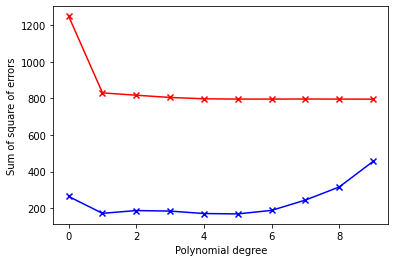

In [ ]:
polynomial_degree = (0,1,2,3,4,5,6,7,8,9)
#We are plotting the training error using the red line plot
plt.plot(polynomial_degree, training_errors, color="r", label="training errors")
plt.scatter(polynomial_degree, training_errors, color="r", marker='x')
#We are plotting the testing error using the blue line plot
plt.plot(polynomial_degree, testing_errors, color="b", label="testing errors")
plt.scatter(polynomial_degree, testing_errors, color="b", marker='x')

plt.xlabel("Polynomial degree")
plt.ylabel("Sum of square of errors")

Text(0, 0.5, 'RMSE error')

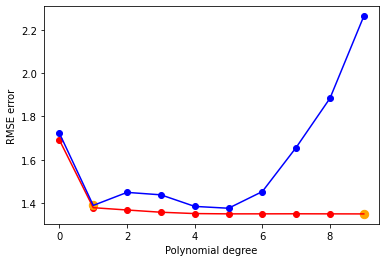

In [ ]:
polynomial_degree = (0,1,2,3,4,5,6,7,8,9)
#We are plotting the training error using the red line plot
min_train_n = np.argmin(rmse_train)
min_test_n = np.argmin(rmse_test_error)
plt.plot(polynomial_degree, rmse_train, color="r", label="training errors")
plt.scatter(polynomial_degree, rmse_train, color="r")
#We are plotting the testing error using the blue line plot
plt.plot(polynomial_degree, rmse_test_error, color="b", label="testing errors")
plt.scatter(polynomial_degree, rmse_test_error, color="b")
plt.scatter(polynomial_degree[min_train_n], rmse_train[min_train_n], color="orange", s=70)
# plt.scatter(polynomial_degree[min_test_n], rmse_test_error[min_test_n], color="g", s=70)
plt.scatter(polynomial_degree[1], rmse_test_error[1], color="orange", s=70)
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE error")

In [ ]:
# len(cumulative_w_for_degrees)

After degree 5, the testing error has started increasing (blue plot), So we consider polynomial of degree 5 as the best model for our regression.
We can also observe that training error keeps on decreasing as we increase the degree of model as we are making the model more flexible, although the testing error is increasing due to overfitting.
Similar results can be seen for the stochastic plots.

We choose the best model by taking the model with minimum testing error

Now we work with stochastic gradient descent method.

In [ ]:
model_arr_stoc = []
w_train_stoc = []
error_mod_stoc = []
for k in range(0,10):
    no_of_coeffients = (k+1)*(k+2)/2
    no_of_coeffients = int(no_of_coeffients)
    w_req_stoc = w[:no_of_coeffients,:]
#     print(X_selected_degree.shape, w_for_selected_degree.shape,X_selected_degree_transpose.shape)
    itere = 100000
    for i in range(itere):
      #Randomly selecting one point from the dataset in every iteration
        rand_no_mat = np.random.randint(low = 0, high = training_datasize, size = 1)
        rand_no = rand_no_mat[0]
        X_selected_degree_stochastic = X_new[rand_no,:no_of_coeffients].reshape(1,no_of_coeffients)
#     print(X_selected_degree_stochastic.shape)
        X_selected_degree_stochastic_transpose = X_selected_degree_stochastic.T
        y_calculated_stochastic = X_selected_degree_stochastic.dot(w_req_stoc)
        diff_stoc = X_selected_degree_stochastic_transpose.dot(y_calculated_stochastic-y_actual_train[rand_no])
        w_req_stoc = w_req_stoc - ita * diff_stoc
    
    model_stoc = X_selected_degree_stochastic.dot(w_req_stoc)
#     print("\n",w_req_stoc)
    model_arr_stoc.append(model_stoc)
    #Appending the calculated w value in stochastic training model
    w_train_stoc.append(w_req_stoc)
    error_mod_stoc.append(calculateError(X_new[:,:no_of_coeffients], w_req_stoc))
training_errors_stochastic = []
print(w_train_stoc)
for items in error_mod_stoc: 
     for item in items: 
       #Appending the calculated training error value for the stochastic training model
         training_errors_stochastic.append(item[0])
rmse_train_stochastic = calculateError2(training_errors_stochastic)

In [ ]:
# print(w_train_stoc)
for i in range(0,10):
    print("Training errors for polynomial of degree {} by stochastic gradient descent method".format(i))
    print(training_errors_stochastic[i],"\n")
    print(rmse_train_stochastic[i],"\n")


In [ ]:
#Similarly calculating the testing error for the stochastic gradient descent model
test_error_poly_stoc = []

for k in range(0,10):
    no_of_coeffients = (k+1)*(k+2)/2
    no_of_coeffients = int(no_of_coeffients)
    test_data_req_stoc = test_data[:,:no_of_coeffients]
    test_data_req_T_stoc = test_data_req.T
    test_pred_stoc = test_data_req_stoc.dot(w_train_stoc[k])
    d_stoc = test_pred_stoc - testing_y_actual
    d_T_stoc = d_stoc.T
    error_stoc = d_T_stoc.dot(d_stoc)
    test_error_poly_stoc.append(error_stoc)

testing_errors_stochastic = []
for items in test_error_poly_stoc: 
     for item in items: 
        testing_errors_stochastic.append(item[0])
rmse_test_stochastic = calculateError22(testing_errors_stochastic)

In [ ]:
# print(testing_error_all_degrees)
for i in range(0,10):
    print("Testing errors for polynomial of degree {} by stochastic gradient descent method".format(i))
    print(testing_errors_stochastic[i],"\n")
    print(rmse_test_stochastic[i],"\n")
    

In [ ]:
polynomial_degree = (0,1,2,3,4,5,6,7,8,9)
#We are plotting the stochastic training error using the red line plot
plt.plot(polynomial_degree, training_errors_stochastic, color="r", label="training errors stochastic")
plt.scatter(polynomial_degree, training_errors_stochastic, color="r")
#We are plotting the stochastic testing error using the blue line plot
plt.plot(polynomial_degree, testing_errors_stochastic, color="b", label="testing errors stochastic")
plt.scatter(polynomial_degree, testing_errors_stochastic, color="b")

plt.xlabel("Polynomial degree")
plt.ylabel("Sum of square of errors")

In [ ]:
error_array = []
error_array.append(rmse_train)
error_array.append(rmse_test_error)
error_array.append(rmse_train_stochastic)
error_array.append(rmse_test_stochastic)
error_array = np.transpose(error_array)
error_array
error_df = pd.DataFrame(error_array, columns = ['rmse_train','rmse_test_error','rmse_train_stochastic','rmse_test_stochastic'])
error_df


In [ ]:
polynomial_degree = (0,1,2,3,4,5,6,7,8,9)
#We are plotting the stochastic training error using the red line plot
min_train = np.argmin(rmse_train_stochastic)
min_test = np.argmin(rmse_test_stochastic)
plt.plot(polynomial_degree, rmse_train_stochastic, color="r", label="training errors stochastic")
plt.scatter(polynomial_degree, rmse_train_stochastic, color="r", marker='x')
plt.scatter(polynomial_degree[min_train], rmse_train_stochastic[min_train], color="g", s=70)
#We are plotting the stochastic testing error using the blue line plot
plt.plot(polynomial_degree, rmse_test_stochastic, color="b", label="testing errors stochastic")
plt.scatter(polynomial_degree, rmse_test_stochastic, color="b", marker = 'x')
plt.scatter(polynomial_degree[min_test], rmse_test_stochastic[min_test], color="g", s=70)
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE errors for stochastic gradient descent")

In [ ]:
single_df = X_train.iloc[:,:3]
single_df

In [ ]:
#Regularizing the parameters i.e. restricting the growth of parameters
def penalty_regularisation(w,q,iterations_,l):
    vec = np.zeros((3,1), dtype=float)
    
    if iterations_!=0:
        for i in range(1,3):
          #Adding the parameter regularzed term to the error function
            vec[i] = 0.5*(l * q * w[i][0] * (abs(w[i][0])**(q-2)))
            
    return vec

In [ ]:
X_degree_one = X_test_data[:,:3]
X_degree_one

In [ ]:
best = cumulative_w_for_degrees[1]

In [ ]:
no_of_coeffients = 3 
iterations_for_regularised = 100000
itar = 0.004
given_arr = [2,1,4,0.5]
lambda_array = [10000,10,1,0.1,0.5,0]
for k in range(len(given_arr)):
    q = given_arr[k]
    for lambda_counter in range(len(lambda_array)):
        X_regul = single_df.to_numpy() 
        X_T_regul = X_regul.T 
        w_regularised = w[:no_of_coeffients,:]
        for i in range(iterations_for_regularised):
            h_t_reg = X_regul.dot(w_regularised) 
            #Unregularized error term
            sum_squared_errors = X_T_regul.dot(h_t_reg-y_actual_train) 
            #Adding the regularized term to sum_squared_errors
            total_regularised_error = sum_squared_errors + penalty_regularisation(w_regularised,q,i,lambda_array[lambda_counter])
            #Applying Gradient Descent Method
            w_regularised = w_regularised -(1/training_datasize) * itar * total_regularised_error
        #Appending the parameters to the regularized-model
        print(f"w values for lambda = {lambda_array[lambda_counter]} and q = {q}: ")
        print(w_regularised)
        print("\n")
        print("Error for given model:")
        print(calculateErrorTest(X_degree_one,w_regularised))
        print("\n")
print("Error for best fit unregularised: (degree=1)")
print(calculateErrorTest(X_degree_one,best))

Compare against best cumulative_w_for_degrees from previous calculations and also with cumulative_w_for_degrees for degree = 1 (lambda=0)

In [ ]:
x1 = test_data[1]
x2 = test_data[2]

X1,X2 = np.meshgrid(x1,x2)



for temp2 in range (0,10):
    print(f"degree: {temp2}\n")
    loop_check = (temp2+1)*(temp2+2)//2
    temp = 1
#     print(temp2)
    Z = cumulative_w_for_degrees[temp2][0][0]
    if(temp2 == 0):
#             print(Z)
            Z = Z.reshape(1,1)
    else:
        for temp3 in range(1,temp2+1):
            xx = temp3
            xy = 0
            for k in range(0,temp3+1,1):
#                 print(Z)
                Z = Z + cumulative_w_for_degrees[temp2][temp]*(X2**xy)*(X1**xx)
                xx = xx-1
                xy = xy+1
                temp = temp+1
    fig = plt.figure(figsize=(13,13))
    ax = plt.axes(projection='3d')
    surface_plt = plt.get_cmap('autumn')
    ax.plot_surface(X1,X2,Z, cmap = surface_plt, rstride=1, cstride=1)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.show()
#     print(Z.shape)